**Problem Statement**

Simulate 100 users & generate data using randomisation & relevant distributions:

For each user

User may take, on average, 15 to 20 full syllabus tests

User may take, on average, 3 to 5 chapter tests between two full tests (i.e., user should take ~3-5 chapter-wise tests before going for taking another full syllabus test. These chapter tests are essentially chapters where we found that student is weak in couple of chapters after analysing performance from last full syllabus test that he/she has taken.)

Generate a test summary with the following features:
test name (For ex: jee-main-full-syllabus-test-1, jee-main-chapter-test-1, jee-main-full-syllabus-test-2, jee-main-chapter-test-2, etc.)
test taken on (timestamp DD-MM-YYYY H:M:S format)
total questions in the test
total time duration of the test (in minutes)
total max marks of the test
time spent in the test (in minutes)
total attempted
total corrects
total incorrects
marks scored
Upper bounds for each of the test type:
In chapter-test:
total questions: 30
total time duration: 60 minutes
total marks of the test: 120
In full syllabus test:
total questions: 90
total time duration: 180 minutes
total marks of the test: 360
Derive test-on-test score improvement from the 1st test till last test, only on the Valid tests

Criteria for valid test:

at least 25% time spent of the total time duration of the test

at least 25% attempts of total questions in the test

at least 25% marks score of the total max marks in the test

Visualise the above score improvement analysis with relevant charts and/or plots
At user level or across all users
You can do score improvement analysis at test-on-test (i.e., test sequence level)

Finally,
Categorise above simulated 100 users in 3 performance categories with the following criteria:
Achiever: Top 5%tile students with highest accuracy
Performer: Next 25%tile students with accuracy lower than Achievers
Fighter: Rest of all the students with accuracy lower than Performers
Visualise score improvement of each of the above performance categories with relevant charts and/or plots
You can do score improvement analysis at test-on-test (i.e., test sequence level) for each category of users


**Note** :
I have stated most assumptions as comments.

**Test summary**

In [1]:
# assuming that user can retake tests and there is no order of test numbers

import random
import time
from datetime import datetime, timedelta
from io import StringIO
from csv import writer
import pandas as pd
from tqdm import tqdm

number_of_users = 100

number_of_full_syllabus_tests_lower = 15
number_of_full_syllabus_tests_upper = 20
number_of_chapter_tests_in_between_lower = 3
number_of_chapter_tests_in_between_upper = 5

full_syllabus_test_total_questions = 90
chapter_test_total_questions = 30

full_syllabus_test_total_time_duration = 180
chapter_test_total_time_duration = 60

full_syllabus_test_total_marks = 360
chapter_test_total_marks = 120

date_timestamp_format = '%m-%d-%Y %H:%M:%S'

full_syllabus_test_type_name = 'full_syllabus'
chapter_test_type_name = 'chapter'

full_syllabus_test_name_template = 'jee-main-full-syllabus-test-'
chapter_test_name_template = 'jee-main-chapter-test-'


total_number_of_full_syllabus_tests = 100 # assumed, can be changed
total_number_of_chapter_tests = 100 # assumed, can be changed

default_year = 2019 # assumed, can be changed
default_month = 10 # assumed, can be changed
default_day_of_month = 12 # assumed, can be changed
default_hour = 14 # assumed, can be changed

default_max_interval_between_tests = 300 # 300 mins assumed, can be changed

min_marks_award_per_correct = 1 # assumed, can be changed
marks_penalty_per_incorrect = -1 # assumed constant negative marking for any question, can be changed

min_time_spent_per_attempted_question = 1 # assumed to be 1 min, can be changed

C:\Users\Rishi\Anaconda3\envs\image\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rishi\Anaconda3\envs\image\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\Rishi\Anaconda3\envs\image\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def generate_test_sequence_for_user(user_id, output):
    
    # random_seed = 42
    # random.seed(random_seed)
    number_of_full_syllabus_tests = random.randint(number_of_full_syllabus_tests_lower,number_of_full_syllabus_tests_upper) 
    
    first_test_taken_on = datetime(default_year, default_month, default_day_of_month, default_hour) # assumed, can be changed
    
    test_number = 0
    
    for i in range(1, number_of_full_syllabus_tests + 1):
        
        test_type = full_syllabus_test_type_name
        test_number_suffix = random.randint(1, total_number_of_full_syllabus_tests)
        test_name = full_syllabus_test_name_template + str(test_number_suffix)
        
        test_number += 1
        
        if(i == 1):
            test_taken_on = first_test_taken_on
        else:
            test_taken_on += timedelta(minutes = random.randint(test_time_spent, default_max_interval_between_tests))
        
        test_total_questions = full_syllabus_test_total_questions
        total_attempted = random.randint(0, test_total_questions)
        total_corrects = random.randint(0, total_attempted)
        total_incorrects = total_attempted - total_corrects
        
        test_total_time_duration = full_syllabus_test_total_time_duration
        min_time_spent = total_attempted * min_time_spent_per_attempted_question
        test_time_spent = random.randint(min_time_spent, test_total_time_duration)
        
        test_total_marks = full_syllabus_test_total_marks
        max_marks_award_per_correct = test_total_marks/ test_total_questions # assumed, can be changed
        min_marks_scored = (total_corrects * min_marks_award_per_correct) + (total_incorrects * marks_penalty_per_incorrect)
        max_marks_scored = (total_corrects * max_marks_award_per_correct) + (total_incorrects * marks_penalty_per_incorrect)
        marks_scored = random.randint(min_marks_scored, max_marks_scored)
        
        row = []
        row.append(user_id)
        row.append(test_number)
        row.append(test_type)
        row.append(test_name)
        row.append(test_taken_on.strftime(date_timestamp_format))
        row.append(test_total_questions)
        row.append(total_attempted)
        row.append(total_corrects)
        row.append(total_incorrects)
        row.append(test_total_time_duration)
        row.append(test_time_spent)
        row.append(test_total_marks)
        row.append(marks_scored)
        csv_writer.writerow(row)
        
        if(i != number_of_full_syllabus_tests):
            number_of_chapter_tests_in_between = random.randint(number_of_chapter_tests_in_between_lower,number_of_chapter_tests_in_between_upper)
            
            for i in range(1, number_of_chapter_tests_in_between + 1):
        
                test_type = chapter_test_type_name
                test_number_suffix = random.randint(1, total_number_of_chapter_tests)
                test_name = chapter_test_name_template + str(test_number_suffix)
                
                test_number += 1

                test_taken_on += timedelta(minutes = random.randint(test_time_spent, default_max_interval_between_tests))

                test_total_questions = chapter_test_total_questions
                total_attempted = random.randint(0, test_total_questions)
                total_corrects = random.randint(0, total_attempted)
                total_incorrects = total_attempted - total_corrects

                test_total_time_duration = chapter_test_total_time_duration
                min_time_spent = total_attempted * min_time_spent_per_attempted_question
                test_time_spent = random.randint(min_time_spent, test_total_time_duration)

                test_total_marks = chapter_test_total_marks
                max_marks_award_per_correct = test_total_marks/ test_total_questions # assumed, can be changed
                min_marks_scored = (total_corrects * min_marks_award_per_correct) + (total_incorrects * marks_penalty_per_incorrect)
                max_marks_scored = (total_corrects * max_marks_award_per_correct) + (total_incorrects * marks_penalty_per_incorrect)
                marks_scored = random.randint(min_marks_scored, max_marks_scored)
                
                row = []
                row.append(user_id)
                row.append(test_number)
                row.append(test_type)
                row.append(test_name)
                row.append(test_taken_on.strftime(date_timestamp_format))
                row.append(test_total_questions)
                row.append(total_attempted)
                row.append(total_corrects)
                row.append(total_incorrects)
                row.append(test_total_time_duration)
                row.append(test_time_spent)
                row.append(test_total_marks)
                row.append(marks_scored)
                csv_writer.writerow(row)

In [3]:
start = time.time()
output = StringIO()
csv_writer = writer(output)

for user_id in tqdm(range(1, number_of_users + 1)):
        generate_test_sequence_for_user(user_id, output)
        
# print(output.getvalue())
output.seek(0)
col_names = ['user_id','user_test_number','test_type','test_name','test_taken_on','test_total_questions','total_attempted','total_corrects','total_incorrects','test_total_time_duration','test_time_spent','test_total_marks','marks_scored']
test_summary_df = pd.read_csv(output, names = col_names, header=None)

end = time.time()
elapsed = end - start
print("Time taken to generate dataset ::")
print(str(timedelta(seconds=elapsed)))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 630.55it/s]


Time taken to generate dataset ::
0:00:00.185505


In [4]:
test_summary_df.head(100)

,user_id,user_test_number,test_type,test_name,test_taken_on,test_total_questions,total_attempted,total_corrects,total_incorrects,test_total_time_duration,test_time_spent,test_total_marks,marks_scored
0,1,1,full_syllabus,jee-main-full-syllabus-test-26,10-12-2019 14:00:00,90,35,13,22,180,155,360,0
1,1,2,chapter,jee-main-chapter-test-46,10-12-2019 17:57:00,30,13,10,3,60,49,120,35
2,1,3,chapter,jee-main-chapter-test-25,10-12-2019 18:58:00,30,30,24,6,60,34,120,24
3,1,4,chapter,jee-main-chapter-test-35,10-12-2019 20:16:00,30,9,7,2,60,30,120,13
4,1,5,chapter,jee-main-chapter-test-65,10-12-2019 20:58:00,30,27,8,19,60,39,120,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,21,chapter,jee-main-chapter-test-85,10-15-2019 15:18:00,30,16,15,1,60,47,120,50
96,2,22,chapter,jee-main-chapter-test-27,10-15-2019 16:17:00,30,15,5,10,60,34,120,-1
97,2,23,full_syllabus,jee-main-full-syllabus-test-44,10-15-2019 17:23:00,90,16,9,7,180,106,360,8
98,2,24,chapter,jee-main-chapter-test-43,10-15-2019 22:02:00,30,24,14,10,60,40,120,13


In [5]:
test_summary_df.shape

(8452, 13)

In [6]:
test_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 13 columns):
user_id                     8452 non-null int64
user_test_number            8452 non-null int64
test_type                   8452 non-null object
test_name                   8452 non-null object
test_taken_on               8452 non-null object
test_total_questions        8452 non-null int64
total_attempted             8452 non-null int64
total_corrects              8452 non-null int64
total_incorrects            8452 non-null int64
test_total_time_duration    8452 non-null int64
test_time_spent             8452 non-null int64
test_total_marks            8452 non-null int64
marks_scored                8452 non-null int64
dtypes: int64(10), object(3)
memory usage: 858.5+ KB


In [7]:
test_summary_df.describe()

,user_id,user_test_number,test_total_questions,total_attempted,total_corrects,total_incorrects,test_total_time_duration,test_time_spent,test_total_marks,marks_scored
count,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000
mean,50.240890,43.217345,42.472788,21.356720,10.666469,10.690251,84.945575,53.343469,169.891150,16.076668
std,28.810233,25.179210,24.348860,18.816804,12.658475,12.634636,48.697719,38.369381,97.395439,35.788414
min,1.000000,1.000000,30.000000,0.000000,0.000000,0.000000,60.000000,0.000000,120.000000,-89.000000
25%,25.000000,22.000000,30.000000,9.000000,2.000000,2.000000,60.000000,30.000000,120.000000,-2.000000
50%,50.000000,43.000000,30.000000,18.000000,7.000000,7.000000,60.000000,43.000000,120.000000,7.000000
75%,75.000000,64.000000,30.000000,27.000000,15.000000,14.000000,60.000000,57.000000,120.000000,27.000000
max,100.000000,102.000000,90.000000,90.000000,87.000000,89.000000,180.000000,180.000000,360.000000,314.000000


**Performance Categorization**

In [8]:
user_avg_marks_scored_full_syllabus_test_df = test_summary_df[test_summary_df['test_type'] == "full_syllabus"].groupby(['user_id'], as_index = False)['marks_scored'].mean()
user_avg_marks_scored_full_syllabus_test_df = user_avg_marks_scored_full_syllabus_test_df.rename(columns = {'marks_scored' : 'full_syllabus_test_avg_marks_scored'})

user_avg_marks_scored_chapter_test_df = test_summary_df[test_summary_df['test_type'] == "chapter"].groupby(['user_id'], as_index = False)['marks_scored'].mean()
user_avg_marks_scored_chapter_test_df = user_avg_marks_scored_chapter_test_df.rename(columns = {'marks_scored' : 'chapter_test_avg_marks_scored'})

user_avg_marks_scored_both_test_types_df = pd.merge(user_avg_marks_scored_full_syllabus_test_df, user_avg_marks_scored_chapter_test_df, on='user_id', how='inner')
user_avg_marks_scored_both_test_types_df['avg_marks_scored_both_test_types'] = user_avg_marks_scored_both_test_types_df['full_syllabus_test_avg_marks_scored'] + user_avg_marks_scored_both_test_types_df['chapter_test_avg_marks_scored']

In [9]:
achiever_percentile_lower = user_avg_marks_scored_both_test_types_df.avg_marks_scored_both_test_types.quantile(0.95)
performer_percentile_lower = user_avg_marks_scored_both_test_types_df.avg_marks_scored_both_test_types.quantile(0.70)

def assign_performance(x):
    if x >= achiever_percentile_lower:
        return 'Achiever'
    elif x < achiever_percentile_lower and x >= performer_percentile_lower:
        return 'Performer'
    else:
        return 'Fighter'

user_avg_marks_scored_both_test_types_df['performance'] = user_avg_marks_scored_both_test_types_df['avg_marks_scored_both_test_types'].apply(lambda x: assign_performance(x))
user_avg_marks_scored_both_test_types_df.head(100)

,user_id,full_syllabus_test_avg_marks_scored,chapter_test_avg_marks_scored,avg_marks_scored_both_test_types,performance
0,1,33.733333,12.466667,46.200000,Fighter
1,2,13.055556,9.388060,22.443615,Fighter
2,3,39.850000,10.569444,50.419444,Fighter
3,4,18.722222,11.225352,29.947574,Fighter
4,5,43.250000,6.926829,50.176829,Fighter
...,...,...,...,...,...
95,96,33.684211,7.608108,41.292319,Fighter
96,97,29.066667,9.017857,38.084524,Fighter
97,98,31.666667,12.562500,44.229167,Fighter
98,99,28.650000,10.534247,39.184247,Fighter


In [10]:
user_avg_marks_scored_both_test_types_df['performance'].value_counts()

Fighter      70
Performer    25
Achiever      5
Name: performance, dtype: int64

In [11]:
test_summary_categorized_df = pd.merge(test_summary_df, user_avg_marks_scored_both_test_types_df, on='user_id', how='inner')
test_summary_categorized_df.head(100)

,user_id,user_test_number,test_type,test_name,test_taken_on,test_total_questions,total_attempted,total_corrects,total_incorrects,test_total_time_duration,test_time_spent,test_total_marks,marks_scored,full_syllabus_test_avg_marks_scored,chapter_test_avg_marks_scored,avg_marks_scored_both_test_types,performance
0,1,1,full_syllabus,jee-main-full-syllabus-test-26,10-12-2019 14:00:00,90,35,13,22,180,155,360,0,33.733333,12.466667,46.200000,Fighter
1,1,2,chapter,jee-main-chapter-test-46,10-12-2019 17:57:00,30,13,10,3,60,49,120,35,33.733333,12.466667,46.200000,Fighter
2,1,3,chapter,jee-main-chapter-test-25,10-12-2019 18:58:00,30,30,24,6,60,34,120,24,33.733333,12.466667,46.200000,Fighter
3,1,4,chapter,jee-main-chapter-test-35,10-12-2019 20:16:00,30,9,7,2,60,30,120,13,33.733333,12.466667,46.200000,Fighter
4,1,5,chapter,jee-main-chapter-test-65,10-12-2019 20:58:00,30,27,8,19,60,39,120,12,33.733333,12.466667,46.200000,Fighter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,21,chapter,jee-main-chapter-test-85,10-15-2019 15:18:00,30,16,15,1,60,47,120,50,13.055556,9.388060,22.443615,Fighter
96,2,22,chapter,jee-main-chapter-test-27,10-15-2019 16:17:00,30,15,5,10,60,34,120,-1,13.055556,9.388060,22.443615,Fighter
97,2,23,full_syllabus,jee-main-full-syllabus-test-44,10-15-2019 17:23:00,90,16,9,7,180,106,360,8,13.055556,9.388060,22.443615,Fighter
98,2,24,chapter,jee-main-chapter-test-43,10-15-2019 22:02:00,30,24,14,10,60,40,120,13,13.055556,9.388060,22.443615,Fighter


**Visualization - test-on-test score-improvement from 1st valid test till last valid test across all users**

In [12]:
def is_test_valid(test_time_spent,test_total_time_duration,total_attempted,test_total_questions,marks_scored,test_total_marks):
    if test_time_spent >= 0.25 * test_total_time_duration:
        if total_attempted >= 0.25 * test_total_questions:
            if marks_scored >= 0.25 * test_total_marks:
                return "Valid"
            else:
                return "Invalid"
        else:
            return "Invalid"
    else:
        return "Invalid"

print(test_summary_categorized_df.columns)
    
test_summary_categorized_df['is_test_valid'] = test_summary_categorized_df.apply(lambda x: is_test_valid(x['test_time_spent'], x['test_total_time_duration'], x['total_attempted'], x['test_total_questions'], x['marks_scored'], x['test_total_marks']), axis = 1)
test_summary_categorized_df.head(100)

Index(['user_id', 'user_test_number', 'test_type', 'test_name',
       'test_taken_on', 'test_total_questions', 'total_attempted',
       'total_corrects', 'total_incorrects', 'test_total_time_duration',
       'test_time_spent', 'test_total_marks', 'marks_scored',
       'full_syllabus_test_avg_marks_scored', 'chapter_test_avg_marks_scored',
       'avg_marks_scored_both_test_types', 'performance'],
      dtype='object')


,user_id,user_test_number,test_type,test_name,test_taken_on,test_total_questions,total_attempted,total_corrects,total_incorrects,test_total_time_duration,test_time_spent,test_total_marks,marks_scored,full_syllabus_test_avg_marks_scored,chapter_test_avg_marks_scored,avg_marks_scored_both_test_types,performance,is_test_valid
0,1,1,full_syllabus,jee-main-full-syllabus-test-26,10-12-2019 14:00:00,90,35,13,22,180,155,360,0,33.733333,12.466667,46.200000,Fighter,Invalid
1,1,2,chapter,jee-main-chapter-test-46,10-12-2019 17:57:00,30,13,10,3,60,49,120,35,33.733333,12.466667,46.200000,Fighter,Valid
2,1,3,chapter,jee-main-chapter-test-25,10-12-2019 18:58:00,30,30,24,6,60,34,120,24,33.733333,12.466667,46.200000,Fighter,Invalid
3,1,4,chapter,jee-main-chapter-test-35,10-12-2019 20:16:00,30,9,7,2,60,30,120,13,33.733333,12.466667,46.200000,Fighter,Invalid
4,1,5,chapter,jee-main-chapter-test-65,10-12-2019 20:58:00,30,27,8,19,60,39,120,12,33.733333,12.466667,46.200000,Fighter,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,21,chapter,jee-main-chapter-test-85,10-15-2019 15:18:00,30,16,15,1,60,47,120,50,13.055556,9.388060,22.443615,Fighter,Valid
96,2,22,chapter,jee-main-chapter-test-27,10-15-2019 16:17:00,30,15,5,10,60,34,120,-1,13.055556,9.388060,22.443615,Fighter,Invalid
97,2,23,full_syllabus,jee-main-full-syllabus-test-44,10-15-2019 17:23:00,90,16,9,7,180,106,360,8,13.055556,9.388060,22.443615,Fighter,Invalid
98,2,24,chapter,jee-main-chapter-test-43,10-15-2019 22:02:00,30,24,14,10,60,40,120,13,13.055556,9.388060,22.443615,Fighter,Invalid


In [13]:
test_summary_categorized_df.shape

(8452, 18)

In [14]:
test_summary_categorized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8452 entries, 0 to 8451
Data columns (total 18 columns):
user_id                                8452 non-null int64
user_test_number                       8452 non-null int64
test_type                              8452 non-null object
test_name                              8452 non-null object
test_taken_on                          8452 non-null object
test_total_questions                   8452 non-null int64
total_attempted                        8452 non-null int64
total_corrects                         8452 non-null int64
total_incorrects                       8452 non-null int64
test_total_time_duration               8452 non-null int64
test_time_spent                        8452 non-null int64
test_total_marks                       8452 non-null int64
marks_scored                           8452 non-null int64
full_syllabus_test_avg_marks_scored    8452 non-null float64
chapter_test_avg_marks_scored          8452 non-null float64
a

In [15]:
test_summary_categorized_df.describe()

,user_id,user_test_number,test_total_questions,total_attempted,total_corrects,total_incorrects,test_total_time_duration,test_time_spent,test_total_marks,marks_scored,full_syllabus_test_avg_marks_scored,chapter_test_avg_marks_scored,avg_marks_scored_both_test_types
count,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000
mean,50.240890,43.217345,42.472788,21.356720,10.666469,10.690251,84.945575,53.343469,169.891150,16.076668,34.328565,11.286403,45.614967
std,28.810233,25.179210,24.348860,18.816804,12.658475,12.634636,48.697719,38.369381,97.395439,35.788414,13.848773,2.769941,14.360964
min,1.000000,1.000000,30.000000,0.000000,0.000000,0.000000,60.000000,0.000000,120.000000,-89.000000,-20.400000,5.661017,-13.960000
25%,25.000000,22.000000,30.000000,9.000000,2.000000,2.000000,60.000000,30.000000,120.000000,-2.000000,26.411765,9.642857,37.121429
50%,50.000000,43.000000,30.000000,18.000000,7.000000,7.000000,60.000000,43.000000,120.000000,7.000000,33.764706,11.000000,45.865079
75%,75.000000,64.000000,30.000000,27.000000,15.000000,14.000000,60.000000,57.000000,120.000000,27.000000,43.687500,12.562500,55.506667
max,100.000000,102.000000,90.000000,90.000000,87.000000,89.000000,180.000000,180.000000,360.000000,314.000000,72.400000,22.836066,82.470175


In [16]:
# write to csv
test_summary_categorized_df.to_csv('./test_summary.csv', header = True, index = False, encoding = 'utf-8')

In [17]:
valid_tests_df = test_summary_categorized_df[test_summary_categorized_df['is_test_valid'] == 'Valid'].drop(['user_test_number', 'full_syllabus_test_avg_marks_scored', 'chapter_test_avg_marks_scored', 'avg_marks_scored_both_test_types'], axis = 1).reset_index(drop=True)

valid_tests_df = valid_tests_df[['user_id', 'test_type', 'test_taken_on',
       'test_total_marks', 'marks_scored']]

# need to rebase user_test_number and select first n tests where n is minimum number of valid tests across all users
gr = valid_tests_df.groupby('user_id')
valid_tests_df['user_test_number'] = gr.cumcount() + 1

min_valid_tests_taken = valid_tests_df.groupby(['user_id'], as_index = False)['user_test_number'].max()['user_test_number'].min()
print(f'Minimum number of valid tests taken across all users :: {min_valid_tests_taken}')

valid_tests_df = valid_tests_df[valid_tests_df['user_test_number'] <= min_valid_tests_taken]

test_number_marks_scored_all_users_df = valid_tests_df.groupby(['user_test_number'], as_index = False)['marks_scored'].sum().rename(columns = {'marks_scored' : 'test_number_marks_scored_all_users'})
test_number_test_total_marks_all_users_df = valid_tests_df.groupby(['user_test_number'], as_index = False)['test_total_marks'].sum().rename(columns = {'test_total_marks' : 'test_number_test_total_marks_all_users'})
test_number_performance_df = pd.merge(test_number_marks_scored_all_users_df, test_number_test_total_marks_all_users_df, on='user_test_number', how='inner')
test_number_performance_df['test_number_performance'] = test_number_performance_df['test_number_marks_scored_all_users'] / test_number_performance_df['test_number_test_total_marks_all_users']
test_number_performance_df.head(100)

Minimum number of valid tests taken across all users :: 6


,user_test_number,test_number_marks_scored_all_users,test_number_test_total_marks_all_users,test_number_performance
0,1,7502,17520,0.428196
1,2,6571,16080,0.408644
2,3,7360,17760,0.414414
3,4,6696,16560,0.404348
4,5,7272,17520,0.415068
5,6,6988,17040,0.410094


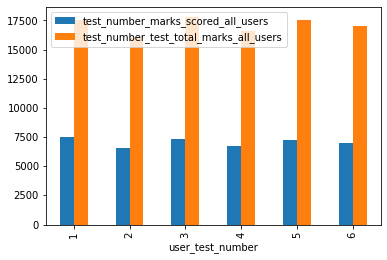

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
test_number_performance_df.plot(x="user_test_number", y=["test_number_marks_scored_all_users", "test_number_test_total_marks_all_users"], kind="bar")

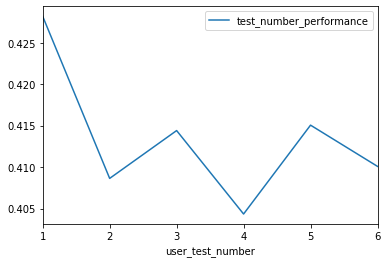

In [19]:
test_number_performance_df.plot(x="user_test_number", y=["test_number_performance"], kind="line")

**Visualization - test-on-test score-improvement from 1st test till last test across all users for each performance category**

**Achievers**

In [20]:
performer_tests_df = test_summary_categorized_df[test_summary_categorized_df['performance'] == 'Achiever'].drop(['user_test_number', 'full_syllabus_test_avg_marks_scored', 'chapter_test_avg_marks_scored', 'avg_marks_scored_both_test_types'], axis = 1).reset_index(drop=True)

performer_tests_df = performer_tests_df[['user_id', 'test_type', 'test_taken_on',
       'test_total_marks', 'marks_scored']]

# need to rebase user_test_number and select first n tests where n is minimum number of tests across all users
gr = performer_tests_df.groupby('user_id')
performer_tests_df['user_test_number'] = gr.cumcount() + 1

min_performer_tests_taken = performer_tests_df.groupby(['user_id'], as_index = False)['user_test_number'].max()['user_test_number'].min()
print(f'Minimum number of tests taken amongst all Achievers :: {min_performer_tests_taken}')

performer_tests_df = performer_tests_df[performer_tests_df['user_test_number'] <= min_performer_tests_taken]
print(performer_tests_df.describe())

test_number_marks_scored_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['marks_scored'].sum().rename(columns = {'marks_scored' : 'test_number_marks_scored_all_users'})
test_number_test_total_marks_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['test_total_marks'].sum().rename(columns = {'test_total_marks' : 'test_number_test_total_marks_all_users'})
test_number_performance_df = pd.merge(test_number_marks_scored_all_users_df, test_number_test_total_marks_all_users_df, on='user_test_number', how='inner')
test_number_performance_df['test_number_performance'] = test_number_performance_df['test_number_marks_scored_all_users'] / test_number_performance_df['test_number_test_total_marks_all_users']
test_number_performance_df.describe()

Minimum number of tests taken amongst all Achievers :: 72
          user_id  test_total_marks  marks_scored  user_test_number
count  360.000000        360.000000    360.000000         360.00000
mean    54.000000        170.000000     23.672222          36.50000
std     26.615178         97.603598     45.367804          20.81153
min     22.000000        120.000000    -78.000000           1.00000
25%     37.000000        120.000000     -0.250000          18.75000
50%     41.000000        120.000000      9.000000          36.50000
75%     77.000000        120.000000     32.000000          54.25000
max     93.000000        360.000000    257.000000          72.00000


,user_test_number,test_number_marks_scored_all_users,test_number_test_total_marks_all_users,test_number_performance
count,72.00000,72.000000,72.000000,72.000000
mean,36.50000,118.361111,850.000000,0.135563
std,20.92845,92.568103,246.462293,0.093936
min,1.00000,-81.000000,600.000000,-0.075000
25%,18.75000,49.000000,600.000000,0.063631
50%,36.50000,93.000000,840.000000,0.135000
75%,54.25000,188.750000,1080.000000,0.194306
max,72.00000,399.000000,1800.000000,0.408333


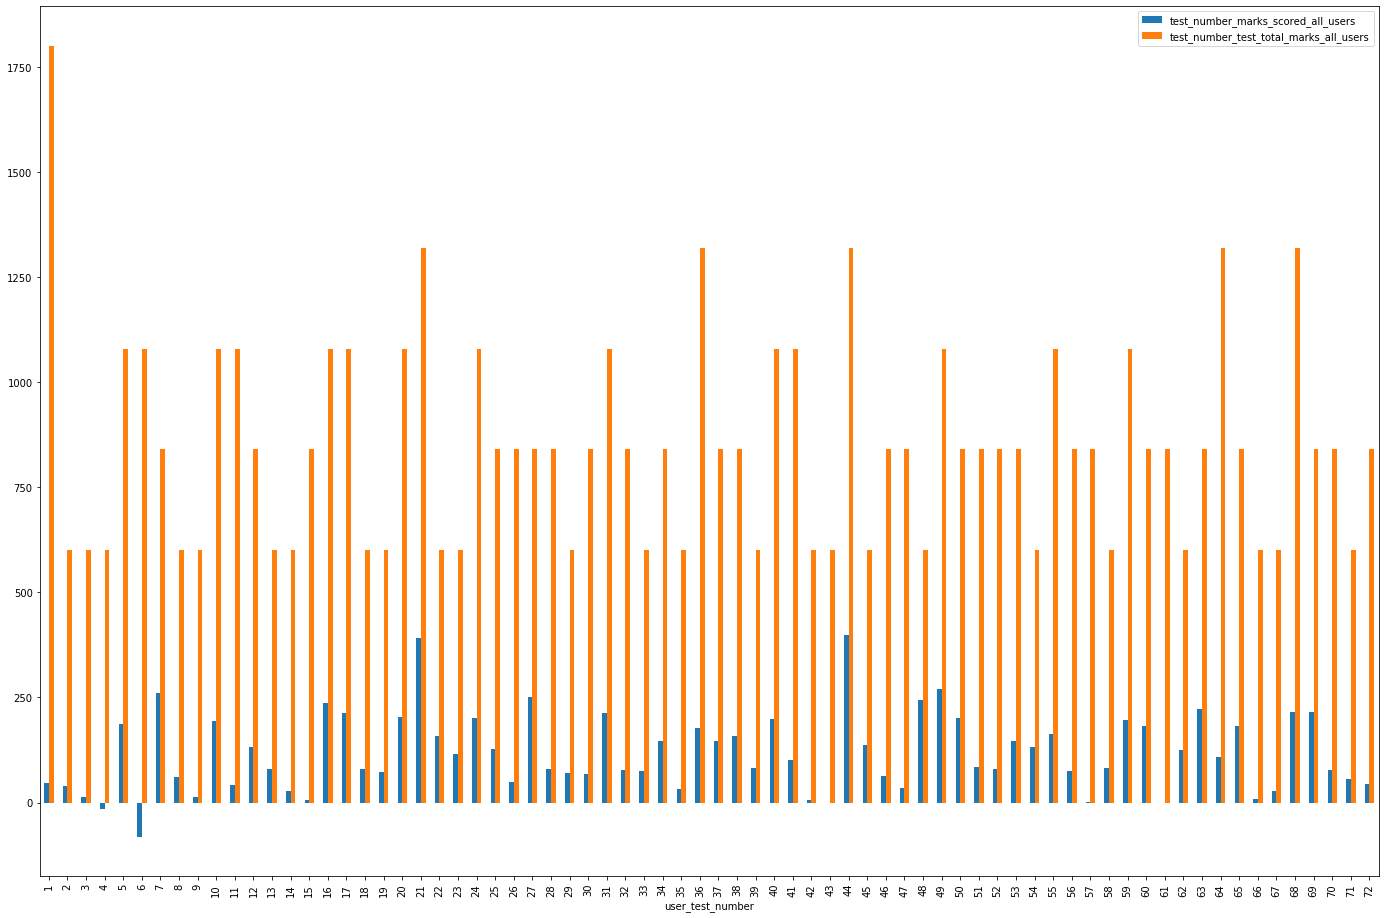

In [21]:
plt.rcParams["figure.figsize"] = (24, 16)
test_number_performance_df.plot(x="user_test_number", y=["test_number_marks_scored_all_users", "test_number_test_total_marks_all_users"], kind="bar")

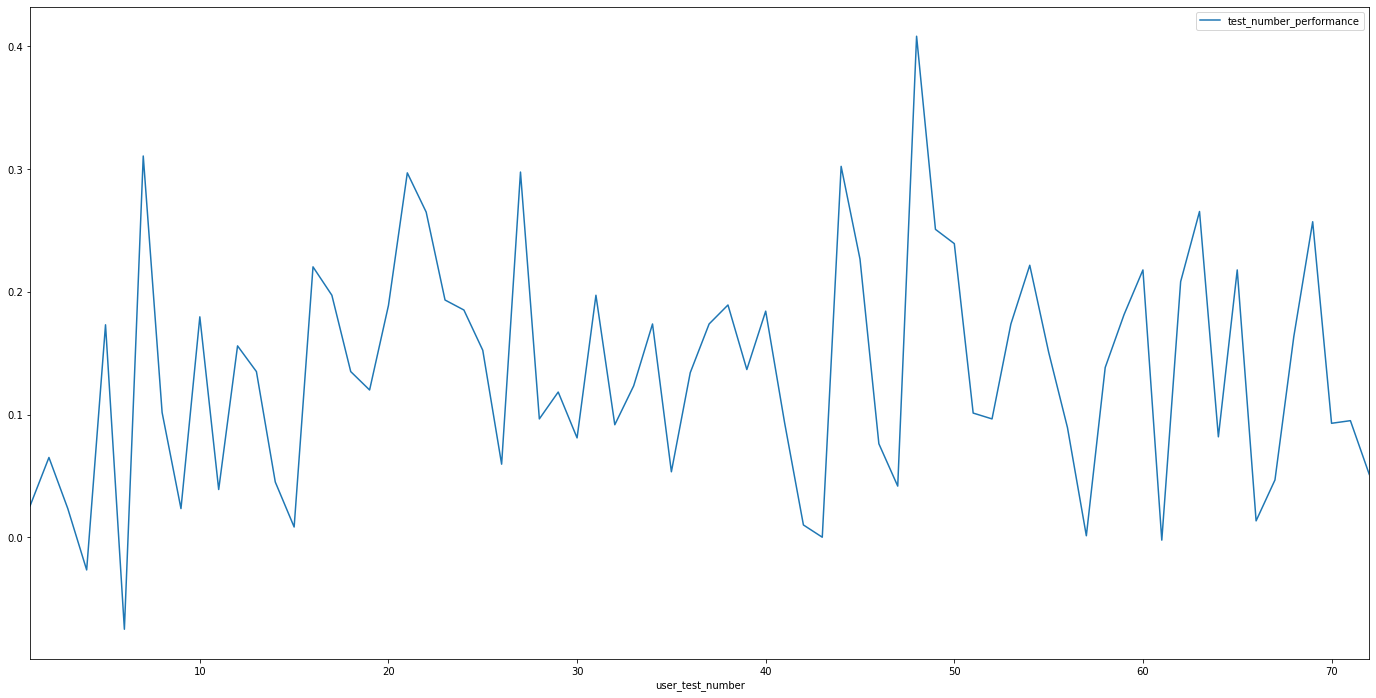

In [22]:
plt.rcParams["figure.figsize"] = (24, 12)
test_number_performance_df.plot(x="user_test_number", y=["test_number_performance"], kind="line")

**Performers**

In [23]:
performer_tests_df = test_summary_categorized_df[test_summary_categorized_df['performance'] == 'Performer'].drop(['user_test_number', 'full_syllabus_test_avg_marks_scored', 'chapter_test_avg_marks_scored', 'avg_marks_scored_both_test_types'], axis = 1).reset_index(drop=True)

performer_tests_df = performer_tests_df[['user_id', 'test_type', 'test_taken_on',
       'test_total_marks', 'marks_scored']]

# need to rebase user_test_number and select first n tests where n is minimum number of tests across all users
gr = performer_tests_df.groupby('user_id')
performer_tests_df['user_test_number'] = gr.cumcount() + 1

min_performer_tests_taken = performer_tests_df.groupby(['user_id'], as_index = False)['user_test_number'].max()['user_test_number'].min()
print(f'Minimum number of tests taken amongst all Performers :: {min_performer_tests_taken}')

performer_tests_df = performer_tests_df[performer_tests_df['user_test_number'] <= min_performer_tests_taken]
print(performer_tests_df.describe())

test_number_marks_scored_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['marks_scored'].sum().rename(columns = {'marks_scored' : 'test_number_marks_scored_all_users'})
test_number_test_total_marks_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['test_total_marks'].sum().rename(columns = {'test_total_marks' : 'test_number_test_total_marks_all_users'})
test_number_performance_df = pd.merge(test_number_marks_scored_all_users_df, test_number_test_total_marks_all_users_df, on='user_test_number', how='inner')
test_number_performance_df['test_number_performance'] = test_number_performance_df['test_number_marks_scored_all_users'] / test_number_performance_df['test_number_test_total_marks_all_users']
test_number_performance_df.describe()

Minimum number of tests taken amongst all Performers :: 68
           user_id  test_total_marks  marks_scored  user_test_number
count  1700.000000       1700.000000   1700.000000       1700.000000
mean     47.640000        168.423529     19.166471         34.500000
std      23.760524         96.344533     39.747481         19.633562
min       8.000000        120.000000    -85.000000          1.000000
25%      27.000000        120.000000     -2.000000         17.750000
50%      47.000000        120.000000      7.500000         34.500000
75%      61.000000        120.000000     28.000000         51.250000
max     100.000000        360.000000    291.000000         68.000000


,user_test_number,test_number_marks_scored_all_users,test_number_test_total_marks_all_users,test_number_performance
count,68.00000,68.000000,68.000000,68.000000
mean,34.50000,479.161765,4210.588235,0.111764
std,19.77372,242.150725,850.232422,0.045091
min,1.00000,81.000000,3000.000000,0.019286
25%,17.75000,314.750000,3720.000000,0.075481
50%,34.50000,446.000000,4200.000000,0.106886
75%,51.25000,635.000000,4500.000000,0.139148
max,68.00000,1462.000000,9000.000000,0.242857


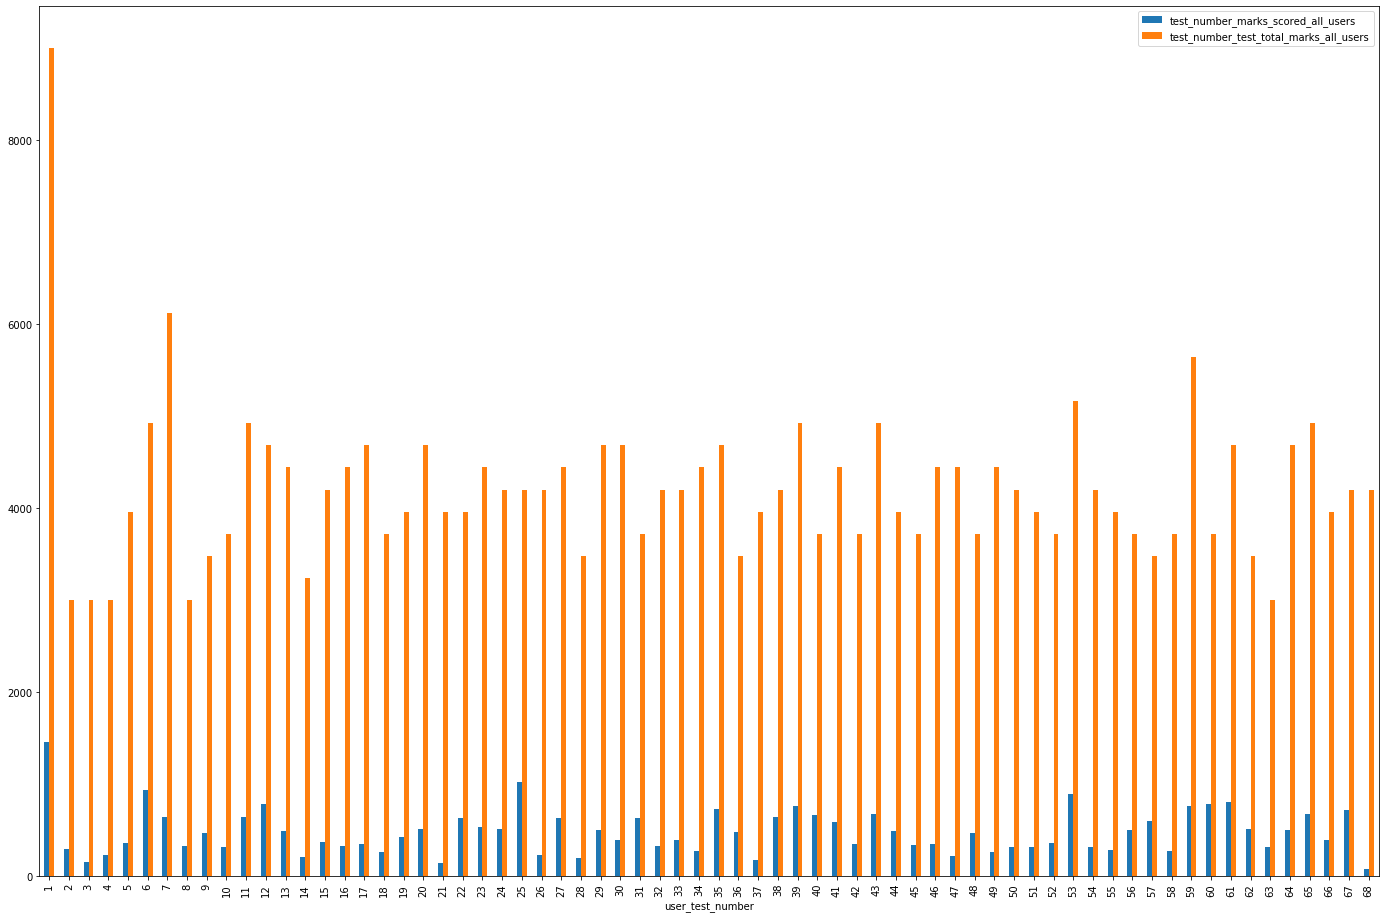

In [24]:
plt.rcParams["figure.figsize"] = (24, 16)
test_number_performance_df.plot(x="user_test_number", y=["test_number_marks_scored_all_users", "test_number_test_total_marks_all_users"], kind="bar")

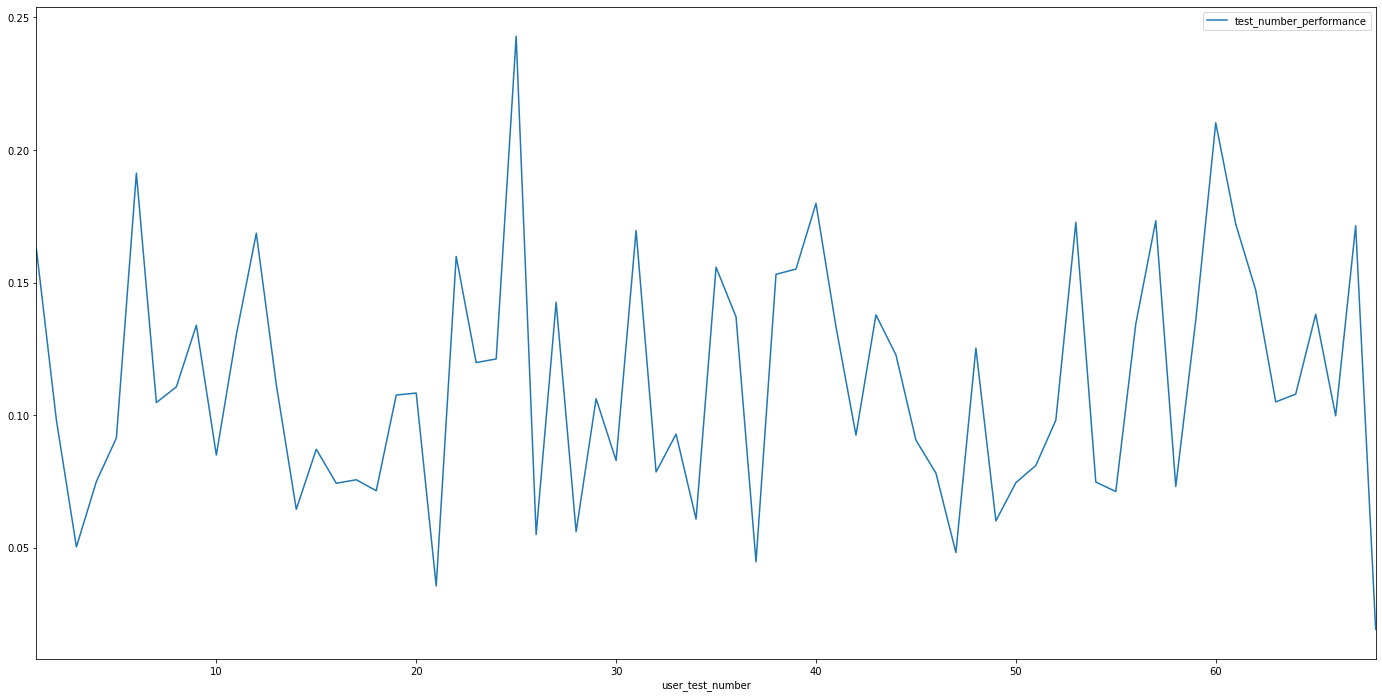

In [25]:
plt.rcParams["figure.figsize"] = (24, 12)
test_number_performance_df.plot(x="user_test_number", y=["test_number_performance"], kind="line")

**Fighters**

In [26]:
performer_tests_df = test_summary_categorized_df[test_summary_categorized_df['performance'] == 'Fighter'].drop(['user_test_number', 'full_syllabus_test_avg_marks_scored', 'chapter_test_avg_marks_scored', 'avg_marks_scored_both_test_types'], axis = 1).reset_index(drop=True)

performer_tests_df = performer_tests_df[['user_id', 'test_type', 'test_taken_on',
       'test_total_marks', 'marks_scored']]

# need to rebase user_test_number and select first n tests where n is minimum number of tests across all users
gr = performer_tests_df.groupby('user_id')
performer_tests_df['user_test_number'] = gr.cumcount() + 1

min_performer_tests_taken = performer_tests_df.groupby(['user_id'], as_index = False)['user_test_number'].max()['user_test_number'].min()
print(f'Minimum number of tests taken amongst all Fighters :: {min_performer_tests_taken}')

performer_tests_df = performer_tests_df[performer_tests_df['user_test_number'] <= min_performer_tests_taken]
print(performer_tests_df.describe())

test_number_marks_scored_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['marks_scored'].sum().rename(columns = {'marks_scored' : 'test_number_marks_scored_all_users'})
test_number_test_total_marks_all_users_df = performer_tests_df.groupby(['user_test_number'], as_index = False)['test_total_marks'].sum().rename(columns = {'test_total_marks' : 'test_number_test_total_marks_all_users'})
test_number_performance_df = pd.merge(test_number_marks_scored_all_users_df, test_number_test_total_marks_all_users_df, on='user_test_number', how='inner')
test_number_performance_df['test_number_performance'] = test_number_performance_df['test_number_marks_scored_all_users'] / test_number_performance_df['test_number_test_total_marks_all_users']
test_number_performance_df.describe()

Minimum number of tests taken amongst all Fighters :: 65
           user_id  test_total_marks  marks_scored  user_test_number
count  4550.000000       4550.000000   4550.000000       4550.000000
mean     51.271429        169.371429     14.686593         33.000000
std      30.564736         97.024089     33.887187         18.763725
min       1.000000        120.000000    -85.000000          1.000000
25%      23.000000        120.000000     -3.000000         17.000000
50%      54.500000        120.000000      6.000000         33.000000
75%      78.000000        120.000000     25.000000         49.000000
max      99.000000        360.000000    314.000000         65.000000


,user_test_number,test_number_marks_scored_all_users,test_number_test_total_marks_all_users,test_number_performance
count,65.00000,65.000000,65.000000,65.000000
mean,33.00000,1028.061538,11856.000000,0.087295
std,18.90767,284.496423,2154.910671,0.022333
min,1.00000,456.000000,8400.000000,0.042663
25%,17.00000,833.000000,11040.000000,0.071650
50%,33.00000,994.000000,11520.000000,0.086250
75%,49.00000,1211.000000,12240.000000,0.101681
max,65.00000,1694.000000,25200.000000,0.137855


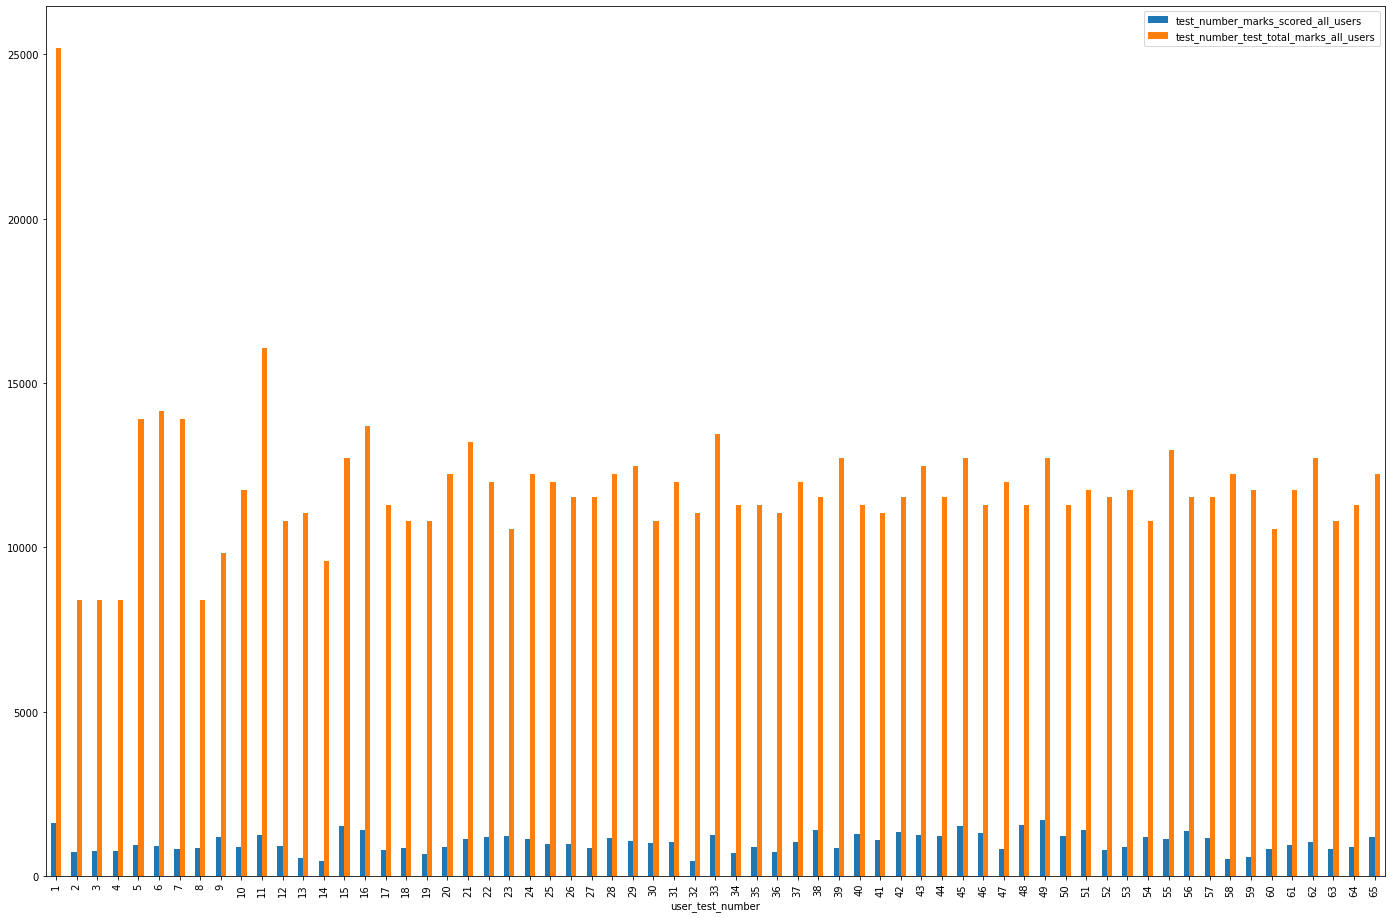

In [27]:
plt.rcParams["figure.figsize"] = (24, 16)
test_number_performance_df.plot(x="user_test_number", y=["test_number_marks_scored_all_users", "test_number_test_total_marks_all_users"], kind="bar")

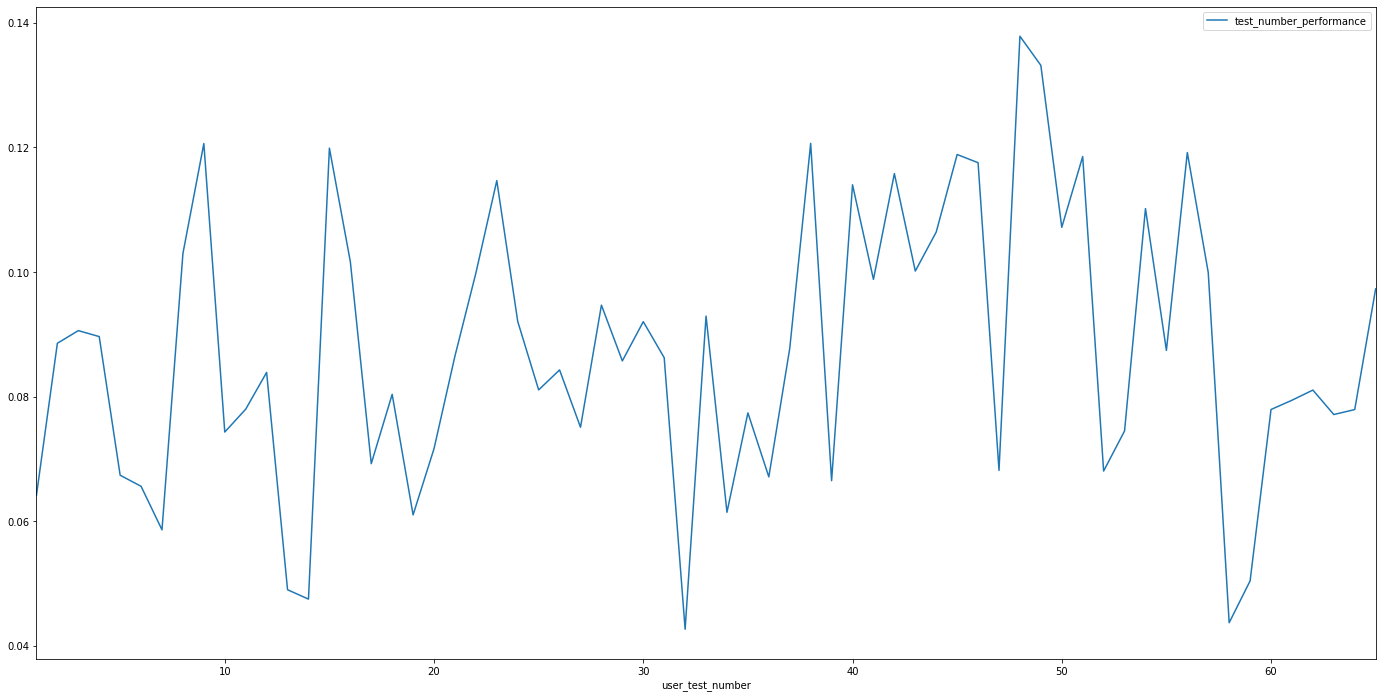

In [28]:
plt.rcParams["figure.figsize"] = (24, 12)
test_number_performance_df.plot(x="user_test_number", y=["test_number_performance"], kind="line")